# Co trzeba zrealizować:
## Sieci MLP
1. Zaimportować potrzebne biblioteki
2. Wczytać odpowiedni zbiór danych
3. Wyuczyć model MLPclassifier dla wybranego zbioru danych przy domyślnych parametrach, podać dokładność rozpoznawania, obliczyć macierz pomyłek i odpowiednio ja wydrukować, wydrukować jak zmienia się funkcja straty w kolejnych krokach uczenia (epokach) 20 pkt
4. Wydrukować pierwszych pięć wzorców, dla których rozpoznawanie jest błędne. Przeanalizować dlaczego występują błędy 10 pkt 
5. Wydzielić zbiór walidujący (dev) ze zbioru testowego – liczność ok 1000 wzorców równomiernie dla każdej klasy. Wydrukować ile jest wzorców w każdej klasie w zbiorze walidującym. 10 pkt
6. Wydrukować krzywą uczenia (zależność funkcji straty od kolejnych epok lub paczek) dla zbioru uczącego i walidującego 20 pkt

RAZEM 60 pkt

## 1. Przygotowanie bibliotek i

In [1]:
# 1. Zaimportowane biblioteki

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

## 2. Wczytanie danych

In [2]:
# 2. a) Wczytanie danych

df_train = pd.read_csv("fashion-mnist_train.csv")
df_train.head()

df_test = pd.read_csv("fashion-mnist_test.csv")
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# 2. b) Wydzienie parametru klasy

y_train = df_train["label"]
y_test = df_test["label"]
print(y_train.head())

X_train = df_train.copy().drop(["label"], axis=1)
X_test = df_test.copy().drop(["label"], axis=1)
X_train.head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Analiza struktury zbioru

In [4]:
# Rozmiar zbioru (l. próbek, l. pixeli)

print(f"Training set: {df_train.shape}")
print(f"Testing set: {df_test.shape}")

Training set: (60000, 785)
Testing set: (10000, 785)


In [5]:
# Liczba próbek w każdej klasie

print(f"Training set: \n{y_train.value_counts().sort_index()}\n")
print(f"Testing set: \n{y_test.value_counts().sort_index()}\n")

Training set: 
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64

Testing set: 
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
Name: label, dtype: int64



In [6]:
# Podpisy klas

lables_dic = {0: "T-shirt/top",
              1: "Trouser",
              2: "Pullover",
              3: "Dress",
              4: "Coat",
              5: "Sandal",
              6: "Shirt",
              7: "Sneaker",
              8: "Bag",
              9: "Ankle boot"}

## Prezentacja przykładowych danych

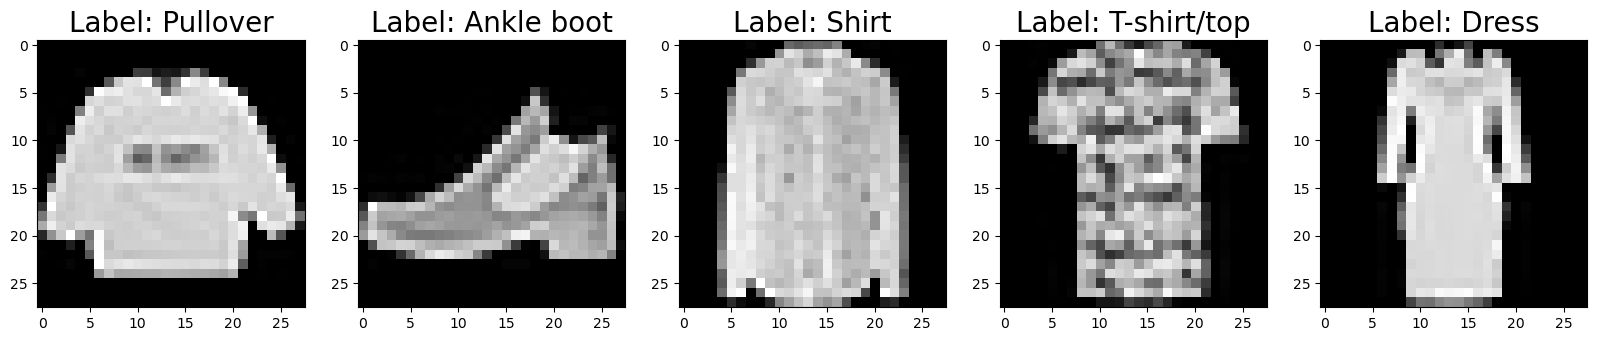

In [7]:
img_size = (28, 28)
plt.figure(figsize=(20, 4))
for i, (img, label) in enumerate(zip(X_train.values[0:5], y_train.values[0:5])):
    plt.subplot(1, 5, i+1)
    plt.imshow(np.reshape(img, img_size), cmap=plt.cm.gray)
    plt.title(f"Label: {lables_dic[label]}", fontsize=20)

## 3. Uczenie modelu

In [ ]:
# 3. a) Uczenie modelu MLPClassifier

mlpc = MLPClassifier()

mlpc.fit(X_train, y_train)

## Predykcja oraz dokładność rozpoznania

In [ ]:
# 3. b) Predykcja oraz jej błąd / wynik

y_pred = mlpc.predict(X_test)

score = mlpc.score(X_test, y_test)
print(f"Accuracy of model (score): {score}")
# print(f"Mean squared log error: {metrics.mean_squared_log_error(y_test, y_pred)}")
# print(f"Mean squared error: {metrics.mean_squared_error(y_test, y_pred)}")
# print(f"Coefficient of determination: {metrics.r2_score(y_test, y_pred)}")

## Macierz pomyłek

In [ ]:
# 3. c) Macierz pomyłek w formie graficznej

cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5,
           square=True, cmap="Blues_r")
plt.ylabel("Label from set")
plt.xlabel("Predicted label")
plt.title(f"Accuracy score: {score}", size=20)
plt.show()

print(lables_dic)

In [ ]:
# 3. d) Funkcja straty w kolejnych krokach uczenia

loss_in_iterations = mlpc.loss_curve_

plt.plot(loss_in_iterations)
plt.title("Loss in iterations")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

## 4. Błędnie rozpoznane wzorce

In [ ]:
# 4. Pierwsze 5 błędnie rozpoznanych wzorców

disp_items = 5
plt.figure(figsize=(28, 4))

i = 0
for (img, test, pred) in zip(X_test.values, y_test.values, y_pred):
    if i >= disp_items:
        break
    if test == pred:
        continue
    plt.subplot(1, disp_items, i+1)
    plt.imshow(np.reshape(img, img_size), cmap=plt.cm.gray)
    plt.title(f"Test: {lables_dic[test]}\nPred: {lables_dic[pred]}", fontsize=20)
    i += 1
plt.show()

## 5. Zbiór walidujący

In [ ]:
# 5. Wydzielenie zbioru walidujacego z testowego

dev_size = 1000
X_test2, X_dev, y_test2, y_dev = train_test_split(X_test, y_test, 
    test_size=dev_size, stratify=y_test)

# Liczba próbek w każdej klasie

print(f"Testing set: \n{y_test2.value_counts().sort_index()}\n")
print(f"Dev set: \n{y_dev.value_counts().sort_index()}\n")

## 6. Krzywe uczenia

In [ ]:
# 6. Krzywe uczenia dla zbioru uczącego oraz walidującego po iteracji

mlpc.fit(X_dev, y_dev)
dev_loss_in_iterations = mlpc.loss_curve_

fig, ax = plt.subplots()
ax.plot(loss_in_iterations, label="loss")
ax.plot(dev_loss_in_iterations, label="dev loss")
plt.legend()
plt.title("Loss in iterations")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

loss [-0.735, -0.701, -0.776, -0.763, -0.79, -0.8, -0.819, -0.812, -0.834, -0.822, -0.826, -0.828, -0.841, -0.835, -0.849, -0.843, -0.845, -0.841, -0.849, -0.853, -0.849, -0.85, -0.841, -0.846, -0.854, -0.841, -0.853, -0.855, -0.857, -0.865, -0.863, -0.862, -0.848, -0.841, -0.858, -0.844, -0.849, -0.856, -0.852, -0.854, -0.846, -0.861, -0.853, -0.86, -0.853, -0.86, -0.863, -0.849, -0.859, -0.851, -0.842, -0.859, -0.853, -0.849, -0.854, -0.858, -0.858, -0.857, -0.86, -0.849, -0.847, -0.854, -0.861, -0.849, -0.871, -0.846, -0.861, -0.852, -0.852, -0.847, -0.857, -0.852, -0.854, -0.852, -0.859, -0.861, -0.856, -0.855, -0.845, -0.855, -0.853, -0.858, -0.853, -0.857, -0.859, -0.851, -0.845, -0.859, -0.852, -0.854, -0.844, -0.851, -0.857, -0.852, -0.86, -0.855, -0.852, -0.854, -0.842, -0.844, -0.842, -0.856, -0.855, -0.843, -0.843, -0.848, -0.847, -0.857, -0.848, -0.841, -0.861, -0.846, -0.848, -0.842, -0.849, -0.849, -0.851, -0.853, -0.852, -0.854, -0.846, -0.847, -0.856, -0.854, -0.855, -0

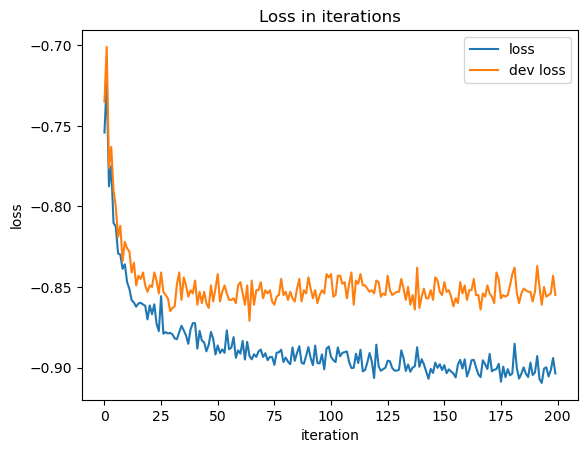

In [15]:
# Krzywe uczenia 

# Nauka i walidacja

# mlpc = MLPClassifier(early_stopping=True, validation_fraction=0.1)
# mlpc.fit(X_train, y_train)

mlpc = MLPClassifier(max_iter=1, warm_start=True)

dev_loss_in_iterations = []
loss_in_iterations = []

iterations = 200
for i in range(iterations):
    mlpc.partial_fit(X_train, y_train, classes=[x for x in range(10)])
    dev_y_pred = mlpc.predict(X_dev)
    dev_loss = -mlpc.score(X_dev, y_dev)
    loss = -mlpc.score(X_train, y_train)
    dev_loss_in_iterations.append(dev_loss)
    loss_in_iterations.append(loss)

print("loss", dev_loss_in_iterations)
a
# loss_in_iterations = mlpc.loss_curve_
# dev_loss_in_iterations = mlpc.validation_scores_


fig, ax = plt.subplots()
ax.plot(loss_in_iterations, label="loss")
ax.plot(dev_loss_in_iterations, label="dev loss")
plt.legend()
plt.title("Loss in iterations")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

dev [[-7.63340630e+01 -9.81470200e+01 -8.60798341e+01 ... -2.08467312e+01
  -4.56237538e+01 -6.94338838e+01]
 [-1.04003541e+01 -1.11864216e+01 -2.59287435e+00 ... -3.82442259e+01
  -1.56764762e+01 -1.11936210e+02]
 [-7.18568818e+00 -6.79856207e+00 -1.18055164e+01 ... -7.31367849e+01
  -9.79950475e+00 -2.49673461e+01]
 ...
 [-3.05201210e+01 -4.75943734e+01 -4.04446552e+01 ... -7.83894153e-02
  -1.39394960e+01 -6.17453686e+00]
 [-3.43119903e+00 -4.92922497e+00 -1.19620373e+00 ... -1.56694664e+01
  -4.82321192e+00 -3.71479400e+01]
 [-6.93950873e+01 -1.55974753e+02 -9.01350762e+01 ... -7.15807002e+00
  -7.58137974e+01 -8.86642609e-04]]


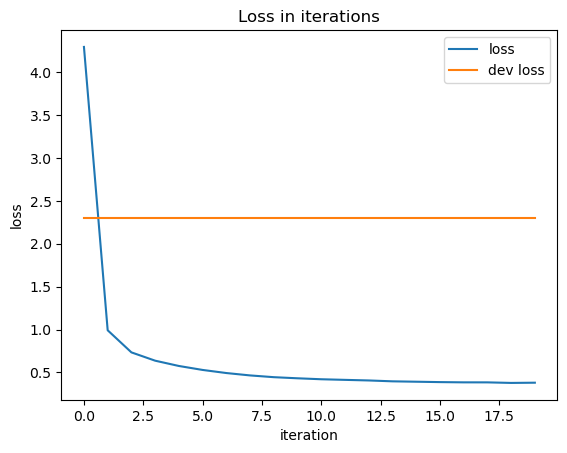

In [16]:
# Krzywe uczenia 

# Nauka i walidacja

# mlpc = MLPClassifier(early_stopping=True, validation_fraction=0.1)
# mlpc.fit(X_train, y_train)

mlpc = MLPClassifier(max_iter=1, warm_start=True)

dev_loss_in_iterations = []
loss_in_iterations = []

iterations = 20
for i in range(iterations):
    mlpc.partial_fit(X_train, y_train, classes=[x for x in range(10)])
    dev_y_pred = mlpc.predict_log_proba(X_dev)
    dev_loss = metrics.log_loss(y_dev, dev_y_pred)
    loss = mlpc.loss_
    dev_loss_in_iterations.append(dev_loss)
    loss_in_iterations.append(loss)

# print("loss", dev_loss_in_iterations)
print("dev", dev_y_pred)

# loss_in_iterations = mlpc.loss_curve_
# dev_loss_in_iterations = mlpc.validation_scores_


fig, ax = plt.subplots()
ax.plot(loss_in_iterations, label="loss")
ax.plot(dev_loss_in_iterations, label="dev loss")
plt.legend()
plt.title("Loss in iterations")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()